# Linked Lists

## Agenda

1. The `LinkedList` and `Node` classes  
2. Implementing `append`
3. Implementing deletion
4. Bidirectional links (Doubly-linked list) & Sentinel head
5. Incorporating a "cursor"
6. Search?
7. Run-time analysis

## 1. The `LinkedList` and `Node` classes

In [7]:
class LinkedList:
    class Node:
        def __init__(self, val, next=None):
            self.val = val
            self.next = next
    
    def __init__(self):
        self.head = None
        self.size = 0
    
    def prepend(self, value):
        newNode = LinkedList.Node(value,self.head)
        self.head = newNode
        self.size += 1
    
    def __len__(self):
        return self.size
        
    def __iter__(self):
        node = self.head
        while node:
            yield(node.val)
            node = node.next
    
    def __repr__(self):
        return '[' + ', '.join(repr(x) for x in self) + ']'

In [8]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## 2. Implementing `append`

### Option 1
Go through the list and find the last element, then append the new element.

In [13]:
class LinkedList (LinkedList): # note: using inheritance to extend prior definition
    def append(self, value):
        node = self.head
        if node:
            while node.next:
                node = node.next
            newNode = LinkedList.Node(value)
            node.next = newNode
        else:
            self.prepend(value)
        self.size += 1

In [14]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Option 2
Adding a tail to our snake

In [18]:
class LinkedList (LinkedList):
    def __init__(self):
        self.head = self.tail = None
        self.size = 0
        
    def prepend(self, value):
        if self.head:
            newNode = LinkedList.Node(value, self.head)
            self.head = newNode
        else:
            self.head = LinkedList.Node(value)
            self.tail = self.head
        self.size += 1
            

        
    def append(self, value):
        newTail = LinkedList.Node(value)
        self.tail.next = newTail
        self.tail = newTail
        if self.head is None:
            self.head = self.tail
        self.size += 1

In [19]:
lst = LinkedList()
lst.prepend(1)
lst.prepend(2)
print(lst)
print(lst.tail.val)
for i in range(10):
    lst.append(i)
print(lst)
lst.tail.val

[2, 1]
1
[2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


9

## 3. Implementing deletion

### Deleting the head

In [ ]:
class LinkedList (LinkedList):
    def del_head(self):
        assert len(self) > 0
        pass

In [ ]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst.del_head()
lst.del_head()
lst

### Deleting the tail

In [ ]:
class LinkedList (LinkedList):
    def del_tail(self):
        assert len(self) > 0
        pass

In [ ]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst.del_tail()
lst.del_tail()
lst

## 4. Bidirectional links (Doubly-linked list) & Sentinel head

In [22]:
class LinkedList:
    class Node:
        def __init__(self, val, prior=None, next=None):
            self.val = val
            self.prior = prior
            self.next  = next
    
    def __init__(self):
        self.head = LinkedList.Node(None)
        self.head.prior = self.head.next = self.head
        self.size = 0
        
    def prepend(self, value):
        newNode = LinkedList.Node(value, prior=self.head, next=self.head.next)
        self.head.next.prior = newNode
        self.head.next = newNode
        self.size += 1

    def append(self, value):
        newNode = LinkedList.Node(value, prior= self.head.prior, next= self.head)
        self.head.prior.next = newNode
        self.head.prior = newNode
        self.size += 1
        
    def __getitem__(self, idx):
        assert idx >= 0 and idx < len(self)
        node = self.head.next
        for _ in range(idx):
            node = node.next
        return node.val
        
    def __len__(self):
        return self.size
        
    def __iter__(self):
        node = self.head.next
        while node is not self.head:
            yield(node.val)
            node = node.next
    
    def __repr__(self):
        return '[' + ', '.join(repr(x) for x in self) + ']'

In [23]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)
for i in range(10):
    lst.append(i)
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 5. Incorporating a "cursor"

In [ ]:
class LinkedList:
    class Node:
        def __init__(self, val, prior=None, next=None):
            self.val = val
            self.prior = prior
            self.next  = next
    
    def __init__(self):
        self.head = self.cursor = LinkedList.Node(None)
        self.head.prior = self.head.next = self.head
        self.size = 0
                
    def append(self, value):
        n = LinkedList.Node(value, prior=self.head.prior, next=self.head)
        n.prior.next = n.next.prior = n
        self.size += 1

    def __getitem__(self, idx):
        assert idx >= 0 and idx < len(self)
        n = self.head.next
        for _ in range(idx):
            n = n.next
        return n.val
        
    def cursor_set(self, idx):
        assert idx >= 0 and idx < len(self)
        pass
    
    def cursor_insert(self, value):
        assert self.cursor is not self.head
        pass
    
    def cursor_delete(self):
        assert self.cursor is not self.head
        pass
        
    def __len__(self):
        return self.size
        
    def __iter__(self):
        n = self.head.next
        while n is not self.head:
            yield n.val
            n = n.next
    
    def __repr__(self):
        return '[' + ', '.join(repr(x) for x in self) + ']'

In [ ]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst

In [ ]:
lst.cursor_set(4)
for x in 'abcd':
    lst.cursor_insert(x)
lst

In [ ]:
lst.cursor_set(8)
for _ in range(4):
    lst.cursor_delete()
lst

## 6. Search?

Linear search with $O(N)$ is the only option when the list is unsorted, but we previously implemented binary search, which runs in $O(\log N)$ time given a sorted list as input.

Does this extend to linked lists?

In [24]:
def contains(lst, x):
    lo = 0
    hi = len(lst)-1
    while lo <= hi: 
        mid = (lo + hi) // 2
        if x < lst[mid]:
            hi = mid - 1
        elif x > lst[mid]:
            lo = mid + 1
        else:
            return True
    else:
        return False

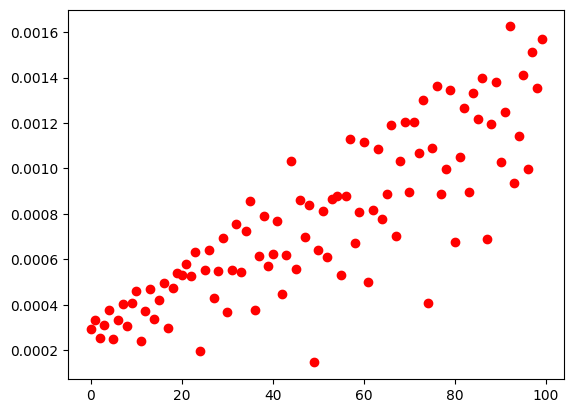

In [26]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

# runtimes when searching for different values in a fixed-size list

def build_sorted_llist(n):
    lst = LinkedList()
    for x in range(n):
        lst.append(x)
    return lst
    
ts = [timeit.timeit(stmt=f'contains(lst, {x})', 
                    setup='lst = build_sorted_llist(100)',
                    globals=globals(), 
                    number=100)
      for x in range(100)]

plt.plot(range(100), ts, 'or');

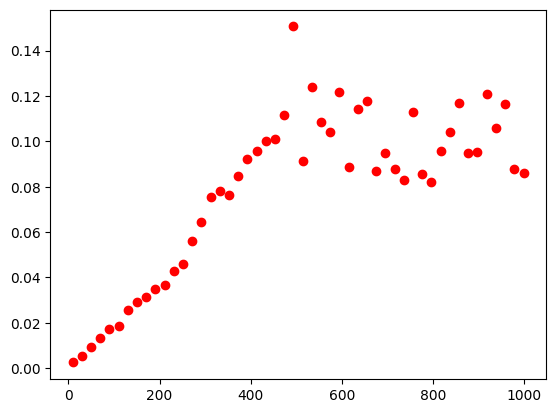

In [29]:
# runtimes when searching for an edge-value in lists of increasing size

ns = np.linspace(10, 1000, 50, dtype=int)
ts = [timeit.timeit('contains(lst, 500)', 
                    setup=f'lst=build_sorted_llist({n})',
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or');

## 7. Runtime analysis

Runtime complexities for circular, doubly-linked list of $N$ elements:

- Indexing (position-based access) = $O(?)$
- Search (unsorted) = $O(?)$
- Search (sorted) = $O(?)$
- Prepend = $O(?)$
- Append = $O(?)$
- Insertion (at arbitrary position): indexing ($O(?)$) + insertion ($O(?)$) = $O(?)$
- Deletion (at arbitrary position): indexing ($O(?)$) + deletion ($O(?)$) = $O(?)$